# **UTS**

## **Nomor 1 (Naive Bayes)**

In [21]:
import pandas as pd
import numpy as np

In [22]:
dataset = pd.read_csv('https://raw.githubusercontent.com/pramdf042/datamining/main/dataR2.csv')
dataset

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [24]:
dataset.empty
dataset.size

1160

In [25]:
x = dataset.drop(['Classification'], axis = 1)
x.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [26]:
y = dataset['Classification']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [28]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
trainNB = nb.fit(x_train, y_train)

trainNB.class_count_

array([42., 50.])

In [29]:
y_pred = trainNB.predict(x_test)

y_pred

array([1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1])

In [30]:
trainNB.predict_proba(x_test)

array([[9.87787689e-01, 1.22123112e-02],
       [1.45791388e-12, 1.00000000e+00],
       [9.50308197e-01, 4.96918031e-02],
       [9.80202244e-01, 1.97977556e-02],
       [9.94829132e-01, 5.17086806e-03],
       [7.14621951e-03, 9.92853780e-01],
       [9.66508542e-01, 3.34914581e-02],
       [5.55854792e-01, 4.44145208e-01],
       [9.48288324e-69, 1.00000000e+00],
       [4.41615386e-08, 9.99999956e-01],
       [1.91309626e-17, 1.00000000e+00],
       [9.59192121e-01, 4.08078792e-02],
       [9.68869529e-01, 3.11304713e-02],
       [9.22729312e-01, 7.72706876e-02],
       [9.99217834e-01, 7.82165762e-04],
       [9.47186594e-01, 5.28134059e-02],
       [9.02404143e-18, 1.00000000e+00],
       [9.84266029e-01, 1.57339713e-02],
       [9.73657705e-01, 2.63422945e-02],
       [9.79374673e-01, 2.06253269e-02],
       [9.33943178e-01, 6.60568220e-02],
       [9.91441278e-01, 8.55872171e-03],
       [1.11566782e-02, 9.88843322e-01],
       [9.57616296e-01, 4.23837037e-02]])

In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[8, 2],
       [9, 5]])

In [32]:
y_actual1 = pd.Series([1, 0,1,0,1,0,1,0,1,0,0,1,1,0,1,1,0,0], name = 'actual')
y_pred1 = pd.Series([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1], name = 'prediction')
df_confusion = pd.crosstab(y_actual1, y_pred1)
df_confusion

prediction,0,1
actual,,
0,7,2
1,1,8


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.47      0.80      0.59        10
           2       0.71      0.36      0.48        14

    accuracy                           0.54        24
   macro avg       0.59      0.58      0.53        24
weighted avg       0.61      0.54      0.52        24



## **Nomor 2 (Decision Tree)**

In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

In [36]:
dataset = pd.read_csv('https://raw.githubusercontent.com/pramdf042/datamining/main/dataR2.csv')
dataset

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [38]:
y = dataset["Classification"]
X = dataset.drop(columns=["Classification"])
klf = tree.DecisionTreeClassifier(criterion="gini")
klf = klf.fit(X, y)

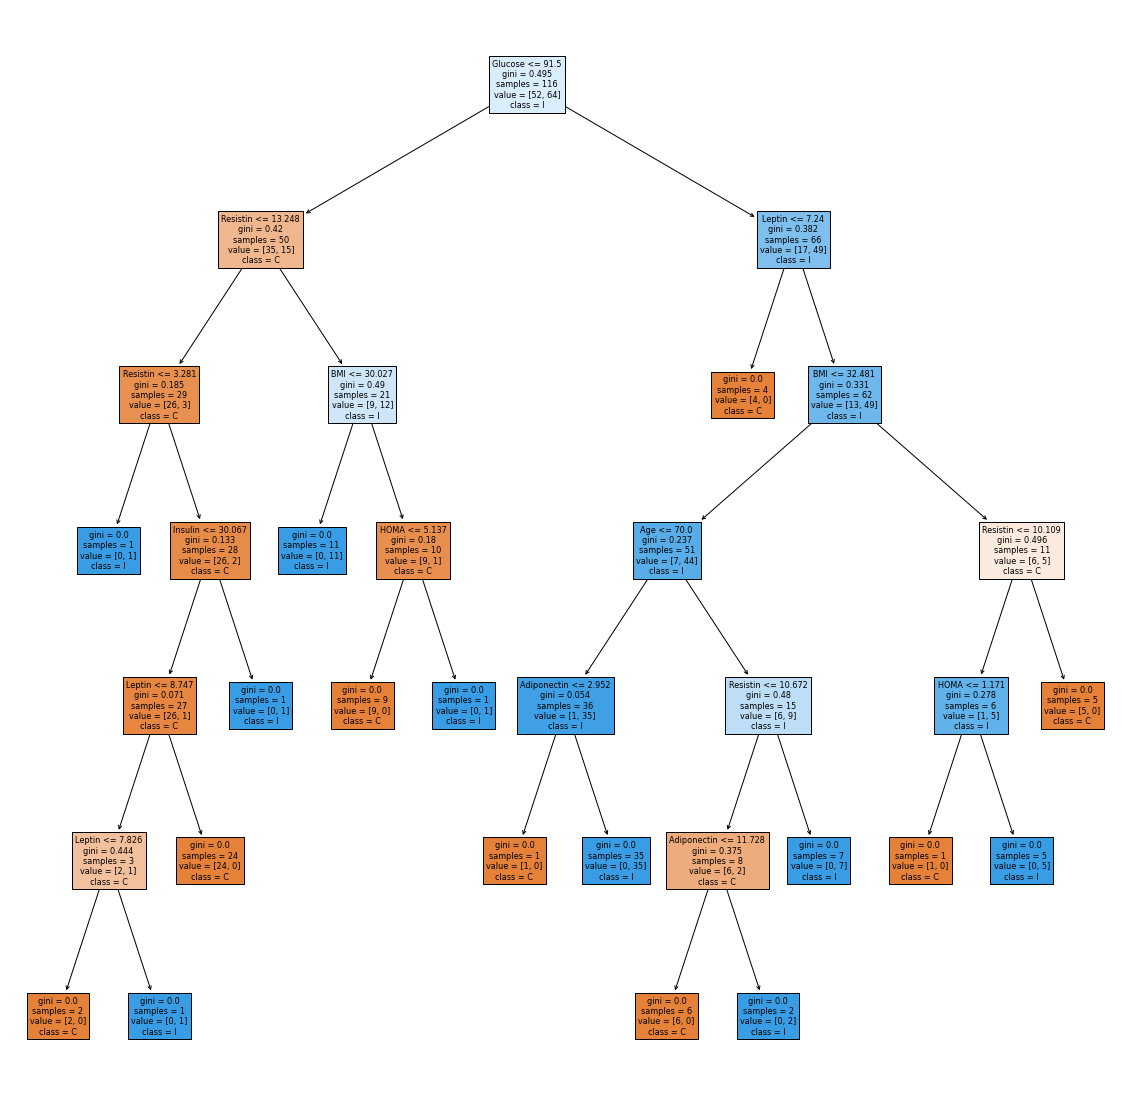

In [40]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(klf, feature_names=list(dataset.columns.values)[:9], class_names=list(dataset.columns.values)[9] ,filled=True)                                   